In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)
# Right click on the BANA6350>Data folder and copy the folder path by click "Copy Path". Then paste that inside the code below to link your folder where all the data will reside

import os

path = "/content/gdrive/MyDrive/BANA7350/Data"

os.chdir(path)

# the above code will change your current working directory to the path i.e., BANA6350/Data folder
# Let's try opening a file inside our Current working directory:

import pandas as pd
pd.read_csv('a10.csv').head()

Mounted at /content/gdrive/


,index,a10
0,1991 Jul,3.526591
1,1991 Aug,3.180891
2,1991 Sep,3.252221
3,1991 Oct,3.611003
4,1991 Nov,3.565869


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [14.0, 6.0]
plt.rcParams['font.size']= 18
plt.style.available   # Check what styles are available for Chart formats by visiting : https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fivethirtyeight')       # Assigning the FiveThirtyEight format, you can choose any of the names from the above link

In [ ]:
!pip install fredapi

In [ ]:
from fredapi import Fred #importing Fred from fredapi
fred = Fred(api_key="9e0f82a9fddc7a0463c03b379d992d96") #creati ng a variable called fred with my api key

In [ ]:
# Series_ID = TXUR  ||  https://fred.stlouisfed.org/series/TXUR

In [ ]:
import pandas as pd

df = pd.read_csv('TXUR.csv', header=0, parse_dates=True, index_col=0) #reading the downloaded data
df

,TXUR
DATE,
1976-01-01,5.8
1976-02-01,5.8
1976-03-01,5.9
1976-04-01,5.9
1976-05-01,5.9
...,...
2023-12-01,3.9
2024-01-01,3.9
2024-02-01,3.9


In [ ]:
df = df.rename(columns={"TXUR":"Unemployment Rate"})    # Changes the column name from RSFHFSN to Retail Sales
df

,Unemployment Rate
DATE,
1976-01-01,5.8
1976-02-01,5.8
1976-03-01,5.9
1976-04-01,5.9
1976-05-01,5.9
...,...
2023-12-01,3.9
2024-01-01,3.9
2024-02-01,3.9


In [ ]:
df.index.freq = 'MS'     # to ensure we have a monthly Frequency we used MS = Month Start (e.g., 1/1/2020), M = Month End (e.g., 1/31/2020), YS = Year Start (1/1/2020) , Y = Year End (e.g., 12/31/2020), similarly Q, QS etc.
df

,Unemployment Rate
DATE,
1976-01-01,5.8
1976-02-01,5.8
1976-03-01,5.9
1976-04-01,5.9
1976-05-01,5.9
...,...
2023-12-01,3.9
2024-01-01,3.9
2024-02-01,3.9


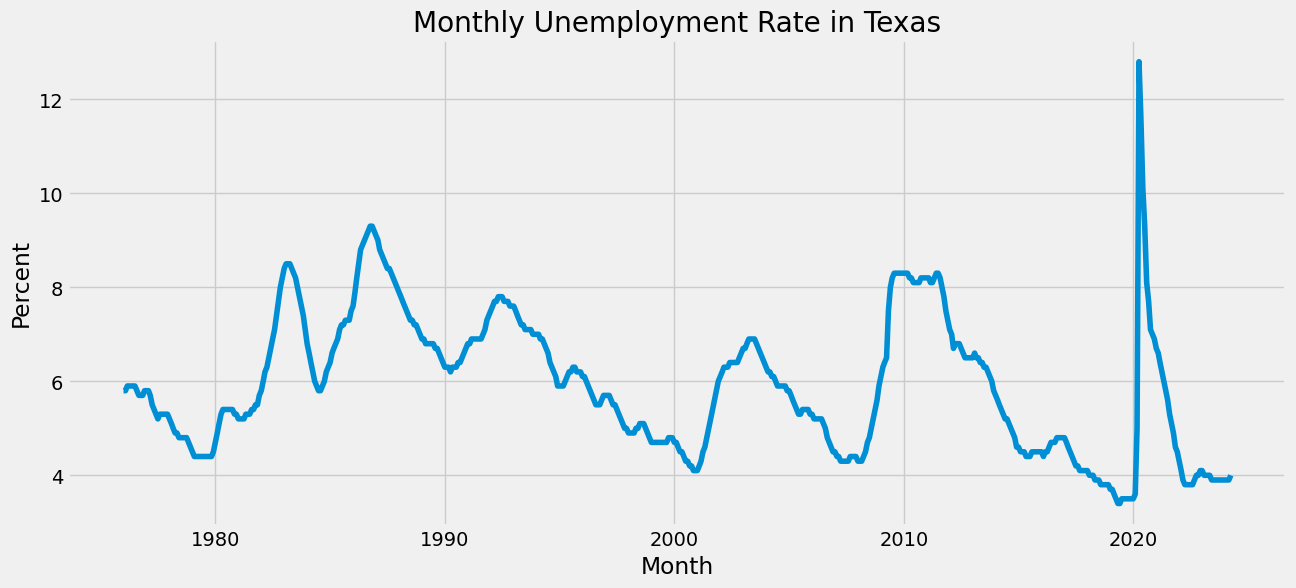

In [ ]:
plt.title("Monthly Unemployment Rate in Texas")
plt.xlabel("Month")
plt.ylabel("Percent")

plt.plot(df)

In [ ]:
from statsmodels.tsa.stattools import adfuller #importing the adfuller function

dfADF = adfuller(df) #creating dfADF variable which stores the adfuller test using df

In [ ]:
#Null Hypothesis:The time series is not stationary
#Alternative Hypothesis: The time series is stationary.

In [ ]:
dfadfOutput = pd.Series(dfADF[0:4], index=[' ADF Test Statistic','p-value','# of Lags','# of Obs']) #Output variable for the adfuller test
for key, value in dfADF[4].items(): #using a for loop to find the critical value of the test
    dfadfOutput['Critical Value (%s)'%key] = value
print(dfadfOutput) #printing the output

 ADF Test Statistic      -3.470549
p-value                   0.008776
# of Lags                 1.000000
# of Obs                578.000000
Critical Value (1%)      -3.441714
Critical Value (5%)      -2.866553
Critical Value (10%)     -2.569440
dtype: float64


In [ ]:
#Since the p-value of 0.008 is less than the alpha value of 0.05, we reject the null hypothesis. There is enough evidence to conclude that the time series is stationary.

In [ ]:
#Box-Cox transformation
import numpy as np
from scipy import stats
from scipy.special import inv_boxcox
import seaborn as sns

In [ ]:
df_boxCox, boxCox_lambda = stats.boxcox(df['Unemployment Rate'])
df_boxCox
boxCox_lambda

-0.04871517894897817

In [ ]:
#lambda value is -0.049 which is closer to 0. This means that the transformation applies a logarithmic function.

In [ ]:
quarterly_resamp = df['Unemployment Rate'].resample('Q').mean() #resampling the data set from monthly to quarterly
quarterly_resamp

DATE
1976-03-31    5.833333
1976-06-30    5.900000
1976-09-30    5.800000
1976-12-31    5.733333
1977-03-31    5.766667
                ...   
2023-06-30    3.966667
2023-09-30    3.900000
2023-12-31    3.900000
2024-03-31    3.900000
2024-06-30    4.000000
Freq: Q-DEC, Name: Unemployment Rate, Length: 194, dtype: float64

<Axes: title={'center': 'Unemployment Rates in Texas'}, xlabel='DATE', ylabel='Percent'>

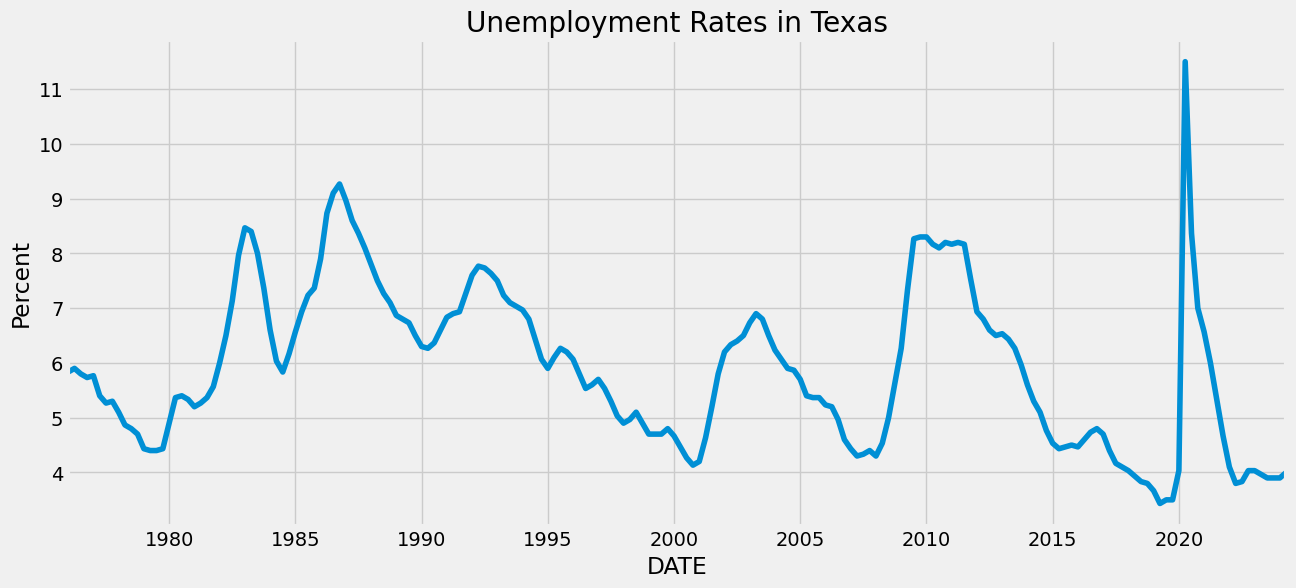

In [ ]:
plt.title("Unemployment Rates in Texas")
plt.xlabel("Quarters")
plt.ylabel("Percent")
quarterly_resamp.plot()
